# STA 141 Assignment 1  
*Tyler Gordon*  
*September 24, 2015*  

Assignment description: 
http://eeyore.ucdavis.edu/stat141/Hws/assignment1.html

## Setup and libraries

In [250]:
setwd("~tgordon/Documents/Statistics/141/1/")
load("vehicles.rda")

library(pander) # For printing in markdown
# panderOptions('table.style', 'rmarkdown')
panderOptions('table.style', 'multiline')
panderOptions('table.split.table', Inf)
panderOptions('table.alignment.default', "left")
panderOptions('table.alignment.rownames', "left")

library(RColorBrewer) 
pal <- brewer.pal(5, "Set2") # Colors for later plots
pal7 <- brewer.pal(7, "Dark2")

library(maps)

library(lattice)

## 1

In [251]:
dim(vposts)

[1] 34677    26

The dataset has 34677 observations.

## 2

The variables in the dataset have the following types:  

In [252]:
vartypes <- sapply(vposts, class)
vartypes

$id
[1] "character"

$title
[1] "character"

$body
[1] "character"

$lat
[1] "numeric"

$long
[1] "numeric"

$posted
[1] "POSIXct" "POSIXt" 

$updated
[1] "POSIXct" "POSIXt" 

$drive
[1] "factor"

$odometer
[1] "integer"

$type
[1] "factor"

$header
[1] "character"

$condition
[1] "factor"

$cylinders
[1] "integer"

$fuel
[1] "factor"

$size
[1] "factor"

$transmission
[1] "factor"

$byOwner
[1] "logical"

$city
[1] "factor"

$time
[1] "POSIXct" "POSIXt" 

$description
[1] "character"

$location
[1] "character"

$url
[1] "character"

$price
[1] "integer"

$year
[1] "integer"

$maker
[1] "character"

$makerMethod
[1] "numeric"

## 3A

In [253]:
mean(is.na(vposts$price), na.rm = F) # proportion of NA values

[1] 0.09597139

Fewer than 10% of vehicles have no recorded value for price and are omitted.

In [254]:
mean(vposts$price, na.rm = T)
median(vposts$price, na.rm = T)

[1] 49449.9

[1] 6700

The mean vehicle price is 49449.9, and the median price is 6700. The large discrepancy between the two suggests skew in the distribution of prices, potentially due to outliers.  

In [255]:
set.caption("Deciles of Vehicle Prices")
pander(quantile(vposts$price, na.rm = T, probs = seq(0.1,1,0.1)))


------------------------------------------------------------
10%   20%   30%   40%   50%   60%   70%   80%   90%   100%  
----- ----- ----- ----- ----- ----- ----- ----- ----- ------
1200  2499  3500  4995  6700  8900  11888 15490 21997 6e+08 
------------------------------------------------------------

Table: Deciles of Vehicle Prices



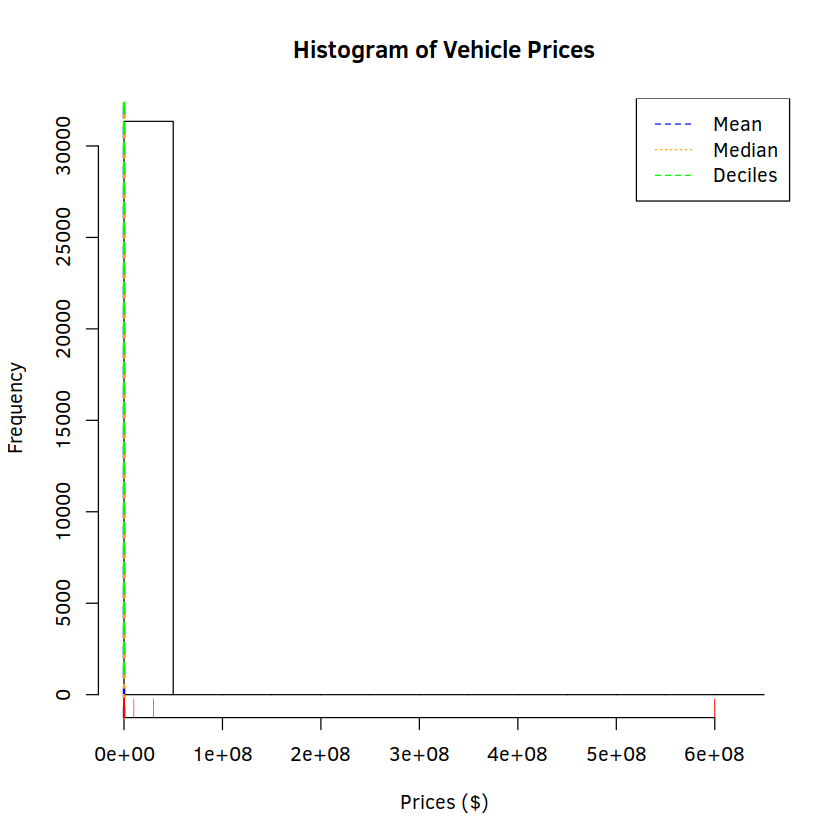

In [256]:
hist(vposts$price, main = "Histogram of Vehicle Prices", xlab = "Prices ($)")
abline(v = mean(vposts$price, na.rm = T), col = "blue", lty = "dashed", lwd = 2)
abline(v = median(vposts$price, na.rm = T), col = "orange", lty = "dotted", lwd = 2)
lines(quantile(vposts$price, na.rm = T, probs = seq(0.1,1,0.1)), col = "green", 
      lty = "dashed", lwd = 2)
legend("topright", legend=c("Mean","Median","Deciles"),
       lty=c("dashed","dotted","dashed"), col=c("blue","orange","green"))
rug(vposts$price, col = "red")

The three outliers visible in the histogram are so large relative to the other values that the mean, median, and all ten deciles are plotted in the same location, a clear indication of a potential problem with these observations.  

Because dealing with these observations is the subject of question 8, and is necessary to produce a useful answer to this question, question 8 is included here and this question is continued afterwards.   

-----


## 8

In [257]:
head(sort(vposts$price, decreasing = T))

[1] 600030000 600030000  30002500   9999999    569500    559500

The highest price, which occurs twice, is `$600030000`. The top three values are each an order of magnitude above the next highest value, which is suspicious.  

The two observations with the highest price are examined first:  

In [258]:
set.caption("The two observations of highest price")
t(vposts[which(vposts$price == max(vposts$price, na.rm = T)),][c("body", "price")])

,posted22491,posted23881
body,"We have 1968 & 1969 Pontiac GTO's. Currently we are working on a 1968 end a 1969 Gto project is almost complete. Our Intention is the custom to specification by owner. Cost will be between $6000 & $30,000. This will be depending on the car in the condition and the Owner financial capabilities. Serious inquires only inquiries only.. please call Tony at show contact info","We have 1968 & 1969 Pontiac GTO's. Currently we are working on a 1968 end a 1969 Gto project is almost complete. Our Intention is the custom to specification by owner. Cost will be between $6000 & $30,000. This will be depending on the car in the condition and the Owner financial capabilities. Serious inquires only inquiries only.. please call Tony at show contact info"
price,600030000,600030000


From the description in the body, it is clear that the price is not meant to be `$600030000`. Because it not known what price the cars have sold or will be sold for, if they have been or will be sold at all, the values must be either removed or replaced with an estimate. I replace both with `$18000`, the average of the given low and high values, under the unsupported assumption that it is more likely that the cars will be sold for an intermediate value than one of the extremes.  

In [259]:
vposts[which(vposts$price == max(vposts$price, na.rm = T)),]$price = 18000

The new maximum value is `$30002500`: 

In [260]:
head(sort(vposts$price, decreasing = T))

[1] 30002500  9999999   569500   559500   400000   359000

In [261]:
set.caption("The new observation of highest price")
t(vposts[which(vposts$price == max(vposts$price, na.rm = T)),][c("body", "price")])

,posted6903
body,"clean, fully loaded, nice shine, good running engine and trans, willing to trade for old school or truck?????????????????? Mounted on 22 inch rims new tires no bends no cracks"
price,30002500


The phrases "willing to trade for old school or truck??????????????????" and "new tires no bends no cracks" strongly suggest that `$30002500` is not the actual value. Unlike the previous observations, however, the description does not clarify the intended price of the vehicle. Based on the precedent of the previous observations, I assume that the poster meant to indicate a range between `$2500` and `$3000` and replace the current value `30002500` with `2750`, the average of the assumed range.  

In [262]:
vposts[which(vposts$price == max(vposts$price, na.rm = T)),]$price = 7500

The new maximum value is `9999999`:  

In [263]:
head(sort(vposts$price, decreasing = T))

[1] 9999999  569500  559500  400000  359000  286763

In [264]:
set.caption("The new observation of highest price")
t(vposts[which(vposts$price == max(vposts$price, na.rm = T)),]
         [c("header", "body", "description", "location", "price")])

,posted16005
header,2001 Honda Accord
body,Selling my car for some lunch money. $20 OBO. Comes with complimentary Oboe.
description,"NEW USED CAR, GOOD BAD CONDITION"
location,(EVERYWHERE) pic
price,9999999


This observation is clearly either a joke or an unorthodox attempt at advertising. It is possible that the poster intended to use the incredibly high listed price and the absurdly low price in the description to attract offers, but phrases like "Selling my car for some lunch money", "Comes with complimentary Oboe", and "NEW USED CAR, GOOD BAD CONDITION", and especially the listing of the location as "(EVERYWHERE)" lead me to believe that this post is only a joke. As a result, I believe it is better to remove this observation entirely rather than use an estimate for a vehicle that is not likely to be sold at all. 

In [265]:
# Remove the joke Honda observation
vposts <- vposts[ - which(vposts$price == max(vposts$price, na.rm = T)),]

## 3B

In [266]:
mean(vposts$price, na.rm = T)
median(vposts$price, na.rm = T)

[1] 9894.919

[1] 6700

The mean vehicle price, previously 49449.9, is now 9894.919, and the median price, previously 6700, is still 6700. 

In [267]:
set.caption("Updated Deciles of Vehicle Prices")
pander(quantile(vposts$price, na.rm = T, probs = seq(0.1,1,0.1)))


------------------------------------------------------------
10%   20%   30%   40%   50%   60%   70%   80%   90%   100%  
----- ----- ----- ----- ----- ----- ----- ----- ----- ------
1200  2499  3500  4995  6700  8900  11888 15490 21995 569500
------------------------------------------------------------

Table: Updated Deciles of Vehicle Prices



With the largest erroneous price values corrected, a slightly better view of the distribution is available:  

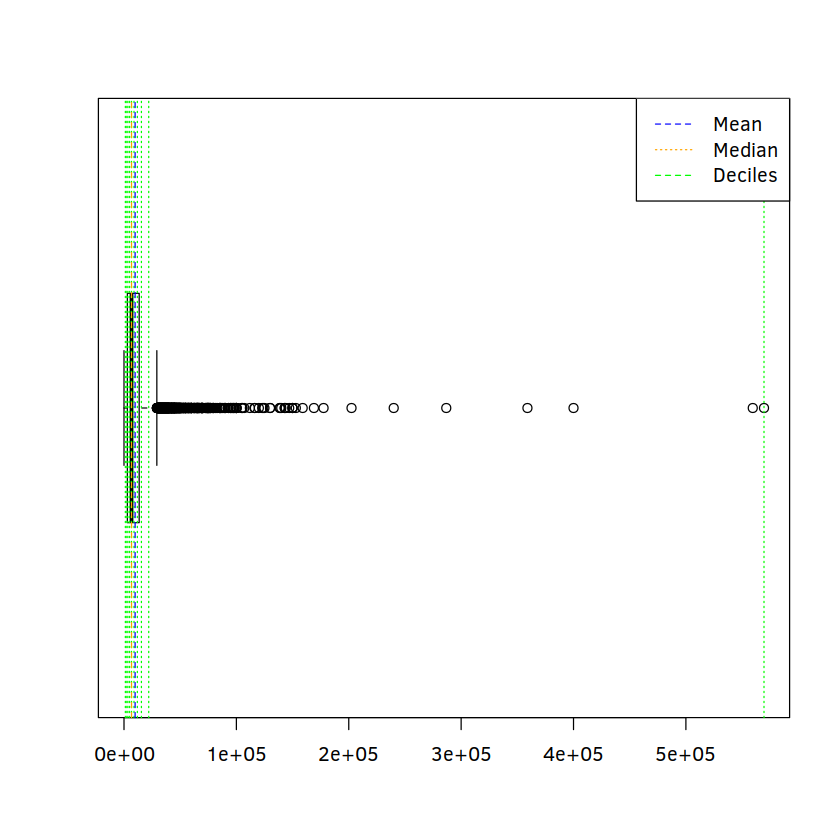

In [268]:
boxplot(vposts$price,horizontal = T)

abline(v = as.vector(quantile(vposts$price, na.rm = T, probs = seq(0.1,1,0.1))),
       col = "green", lty = "dotted")

abline(v = mean(vposts$price, na.rm = T), col = "blue", lty = "dashed")
abline(v = median(vposts$price, na.rm = T), col = "orange", lty = "dashed")

legend("topright", legend=c("Mean","Median","Deciles"), lty=c("dashed","dotted","dashed"), 
       col=c("blue","orange","green"))

## 4
The types of vehicles that are included in the dataset and the proportions of each type are as follows:  


In [269]:
sort(prop.table(table(vposts$type)), decreasing = TRUE) == sort(table(vposts$type) / length(vposts$type), decreasing = TRUE)

sedan         SUV       coupe       truck      pickup   hatchback 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
convertible       other       wagon         van    mini-van     offroad 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
        bus 
      FALSE

In [270]:
type.props <- sort(table(vposts$type, useNA = "always") / length(vposts$type), decreasing = TRUE)
names(type.props)[is.na(names(type.props))] <- "NA" # Use string for plots

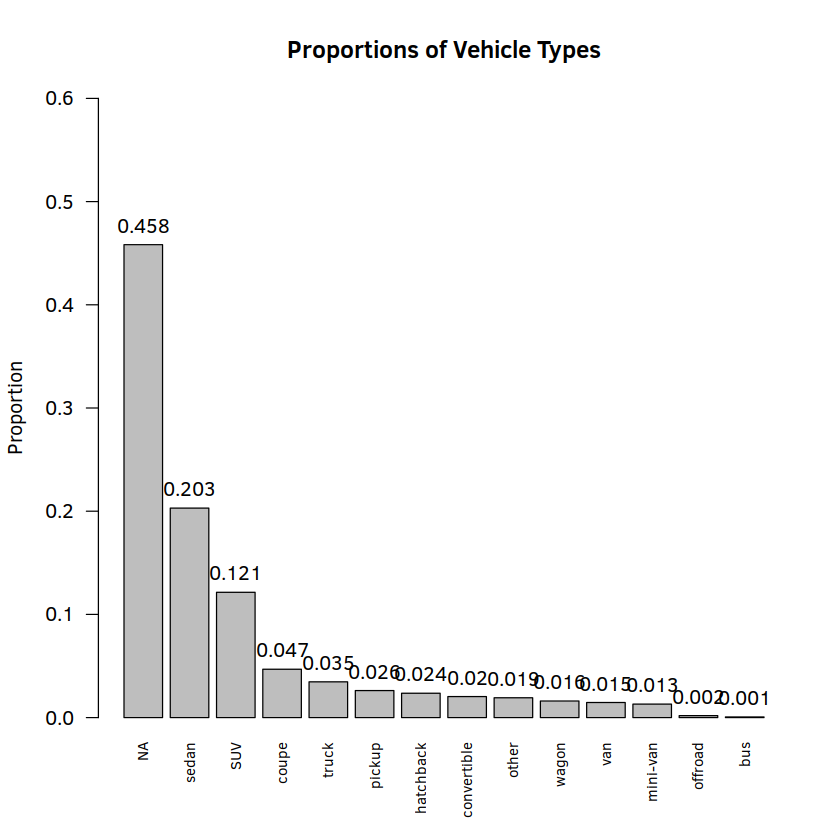

In [271]:
barp <- barplot(type.props, horiz=F, cex.names = 0.75, ylim = c(0, 0.6), las = 2, srt = 90)
title(main="Proportions of Vehicle Types", ylab="Proportion")
text(x=barp, y=type.props, pos=3, labels = round(type.props,3))

#### Proportions of Vehicle Types

In [272]:
round(type.props, 3)

         NA       sedan         SUV       coupe       truck      pickup 
      0.458       0.203       0.121       0.047       0.035       0.026 
  hatchback convertible       other       wagon         van    mini-van 
      0.024       0.020       0.019       0.016       0.015       0.013 
    offroad         bus 
      0.002       0.001 

Nearly half of the observations are missing a value for this variable. Some vehicles may be difficult to classify, but these can be represented with the "other" category. Instead, the high proportion of missing values may be a result of the users of the website not feeling the need to specify the category of their vehicle when they have already listed the specific model elsewhere in their posting, as seen in the other variables `title`, `body`, and `header`. To test this idea, it might be useful to examine these three other variables to see if more popular vehicles are more likely to have the type value omitted, because the posters may assume that users searching for a car on the website will recognize the types of popular vehicles.  

## 5


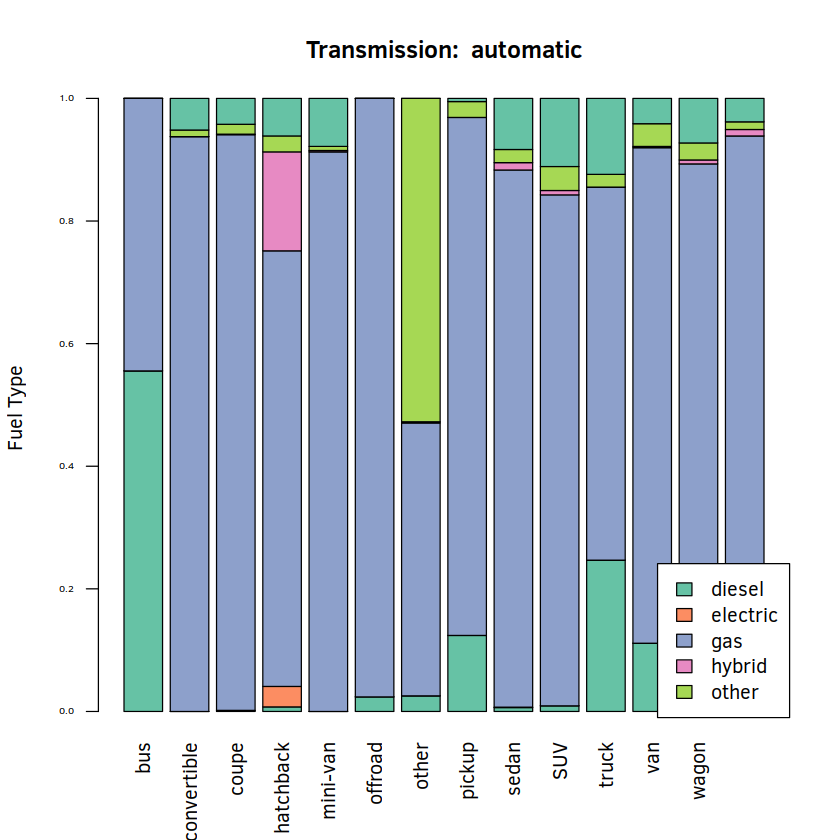

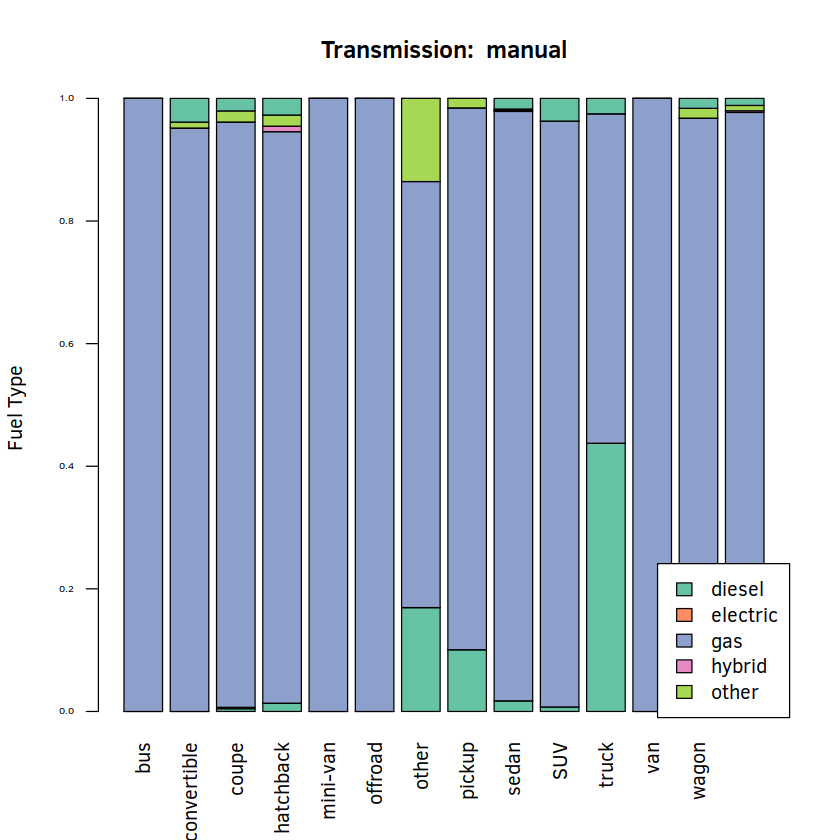

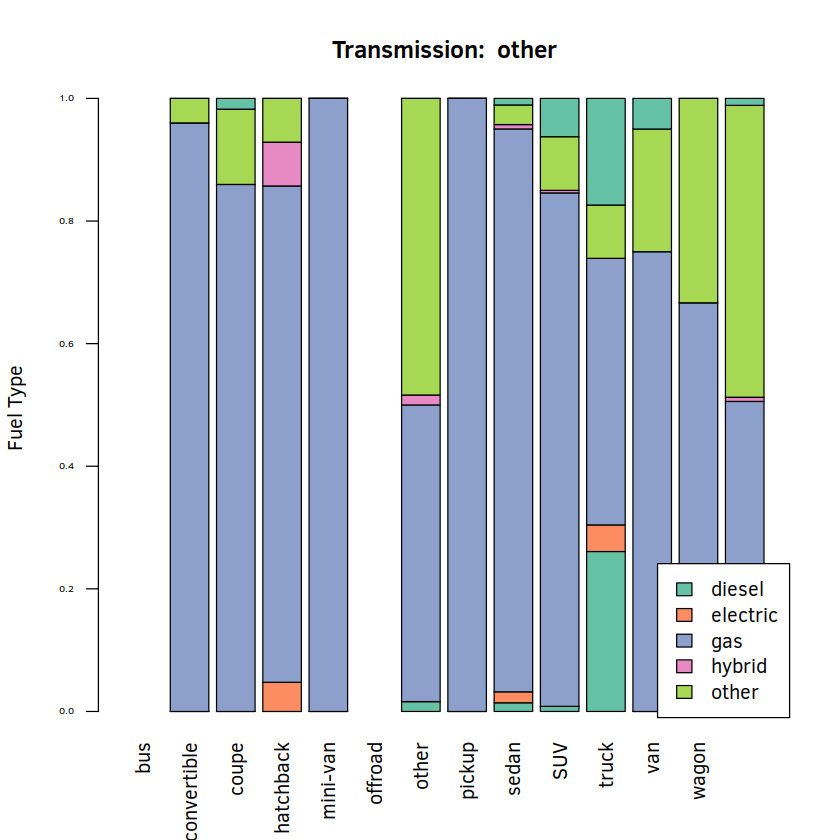

In [273]:
invisible(sapply(levels(vposts$transmission), function(transm.type)
{
  trans.subs <- subset(vposts, transmission == transm.type)
  fuel.type.table <- table(trans.subs$fuel, trans.subs$type, useNA = "always")
  
  fuel.type.prop.table <- apply(fuel.type.table, 2, function(a.col){
    a.col / sum(a.col)
  })
  
  barplot(fuel.type.prop.table, ylab="Fuel Type", 
          main=paste("Transmission: ", transm.type), col=pal, cex.axis=0.5, las=2)
  legend("bottomright", legend = levels(trans.subs$fuel), fill = pal, xpd = TRUE)
}))

The plots show that the "other" fuel type is much more popular in vehicles of the "other" transmission type, that "electric" and "hybrid" are less popular fuel types for manual hatchbacks than automatic ones, and that gas is by far the most popular fuel type overall. 

## 6

In [274]:
length(levels(vposts$city))

[1] 7

7 cities are represented in the dataset.

## 7

In [275]:
city.byOwner.table <- table(vposts$city, vposts$byOwner)
colnames(city.byOwner.table) <- c("By Dealer", "By Owner")

city.byOwner.props <- t(apply(city.byOwner.table, 1, function(a.row) a.row / sum(a.row)))

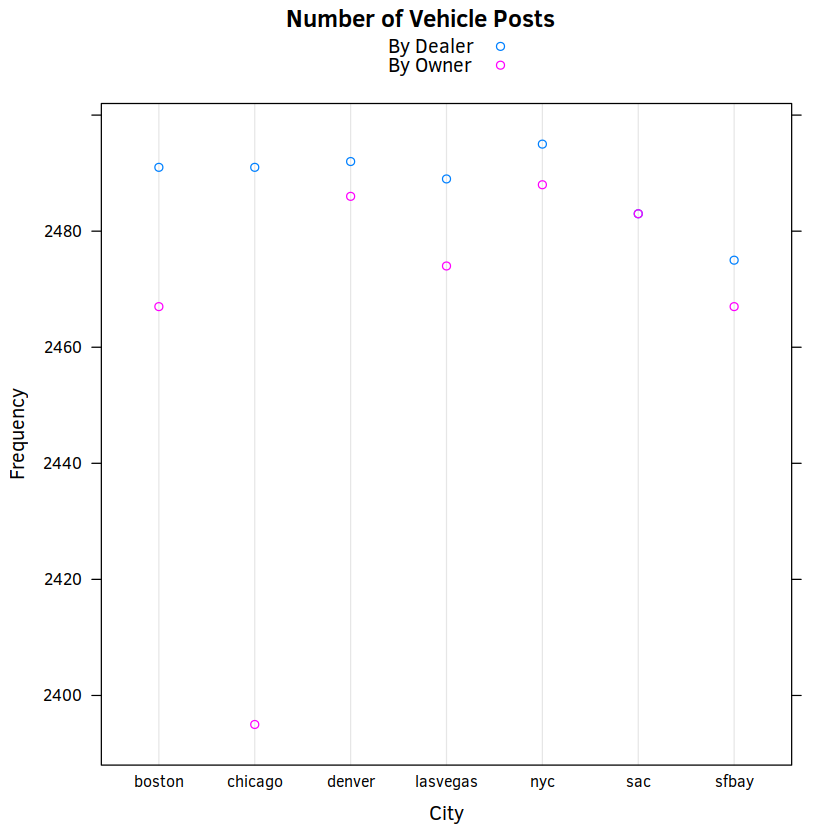

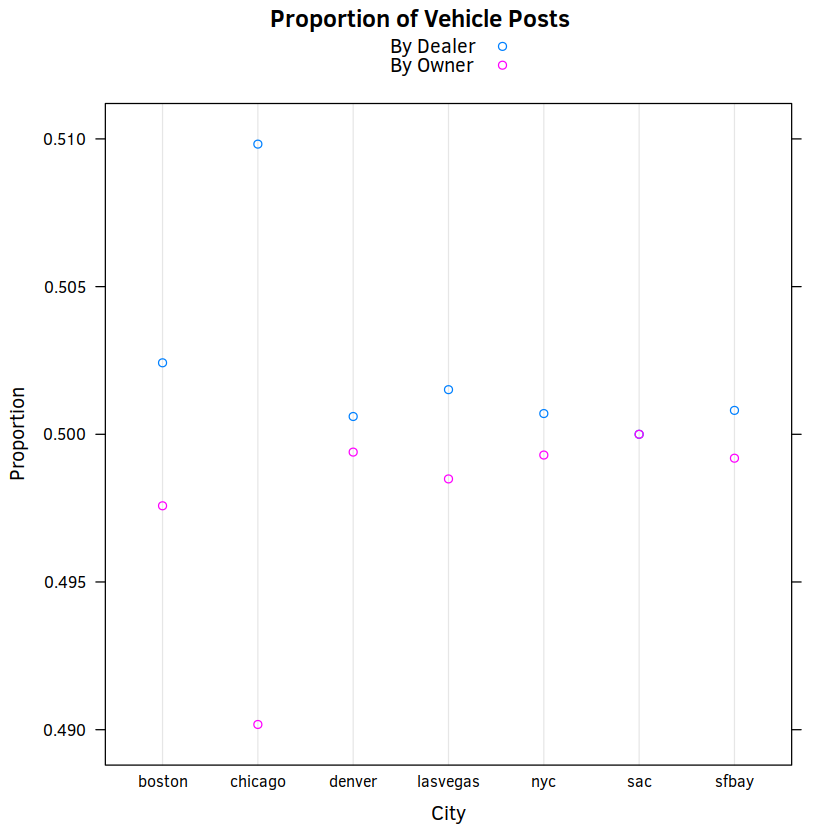

In [276]:
dotplot(city.byOwner.table, horizontal = FALSE, auto.key=TRUE,
        main="Number of Vehicle Posts", ylab="Frequency", xlab="City")

dotplot(city.byOwner.props, horizontal = FALSE, auto.key=TRUE,
        main="Proportion of Vehicle Posts", ylab="Proportion", xlab="City")

The proportion of posts by dealer is greater than or equal to the proportion by owner in each city. The differences in proportion are minimal, however, with the greatest being approximately `.02`. As stated in class, the near equivalence of these proportions is due to the method of data collection, so the potential inference is limited.

## 9

In [277]:
vp.split.city <- split(vposts, vposts$city)
# Creates a matrix of the top 3 vehicle makers for each city
top3.makers <- sapply(vp.split.city, function(city.df){

  city.split.byOwner <- split(city.df, city.df$byOwner)
  city.byOwner <- city.split.byOwner$"TRUE"
  city.byDealer <- city.split.byOwner$"FALSE"
  
  table.byOwner <- sort(table(city.byOwner$maker), decreasing = TRUE)
  table.byDealer <- sort(table(city.byDealer$maker), decreasing = TRUE)
  # Save only the names of the top 3 makers
  top3.byOwner <- names(head(table.byOwner, 3))
  top3.byDealer <- names(head(table.byDealer, 3))
  
  top3 <- c(top3.byOwner, top3.byDealer)
  names(top3) <- c(rep("By Owner", 3), rep("By Dealer", 3))
  return(top3)
})

In [278]:
set.caption("The three most popular makers (most popular first)")
top3.makers

,boston,chicago,denver,lasvegas,nyc,sac,sfbay
By Owner,ford,chevrolet,ford,ford,nissan,toyota,toyota
By Owner,honda,ford,chevrolet,chevrolet,toyota,ford,honda
By Owner,chevrolet,honda,toyota,toyota,honda,chevrolet,ford
By Dealer,ford,chevrolet,ford,ford,nissan,ford,toyota
By Dealer,toyota,ford,chevrolet,nissan,toyota,toyota,ford
By Dealer,chevrolet,nissan,dodge,chevrolet,honda,chevrolet,bmw


Overall, the top makers are fairly consistent between vehicles sold by owner and by dealer: in each city at least 2 of the top 3 makers are the same, and 6 of the 7 cities have the same top maker. 

## 10

In [279]:
set.caption("Summary of Vehicle Years")
summary(vposts$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4    2002    2006    2004    2010    2022 

The summary of the vehicle years suggests some problems with the minimum and maximum observations.  

In [280]:
old.observation <- vposts[vposts$year == min(vposts$year, na.rm = T),
                          c("title", "header", "year")]

In [281]:
set.caption("The observation of oldest year")
old.observation

,title,header,year
posted9673,argolic eni-04 JEeP wraNgler Clean lEATHeR - $2532 (chicago),04 vctvhmfdk,4


The value entered for year is most likely to mean 2004 because of the "04", so I changed it to 2004. 

In [282]:
vposts[vposts$year == min(vposts$year, na.rm = T),]$year <- 2004

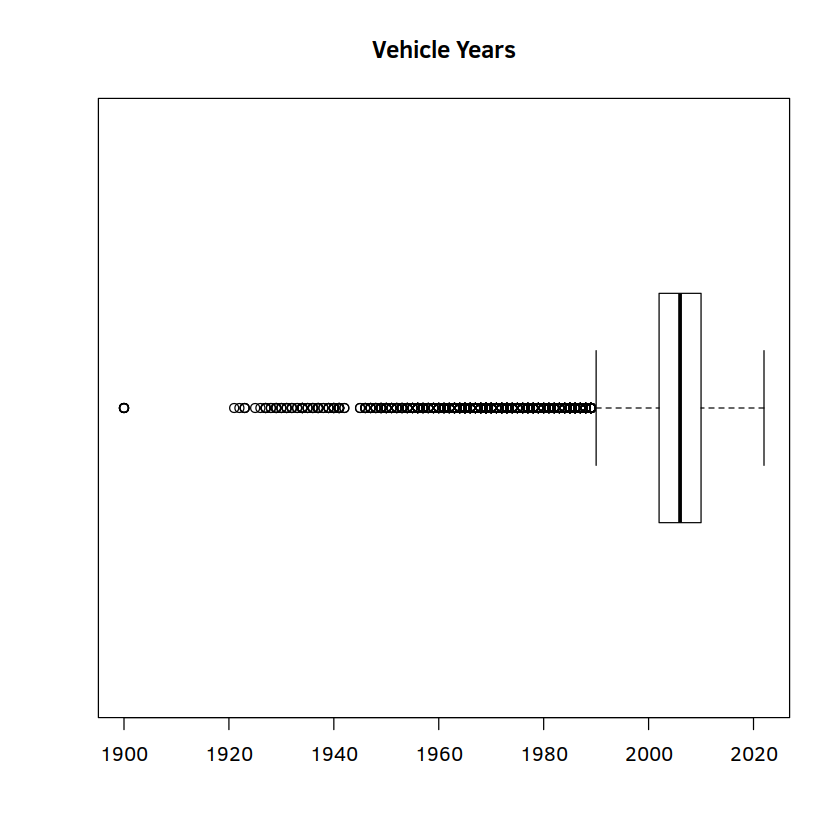

In [283]:
boxplot(vposts$year, horizontal = T, main="Vehicle Years")

Once again, the minimum value, 1900, appears suspicious, with no observations having years between 1901 and 1920.  

In [284]:
old.observation <- vposts[vposts$year == min(vposts$year, na.rm = T), 
                    c("body", "description", "price", "year")]

In [285]:
set.caption("The new observations of oldest year")
# Don't show the duplicates of "posted64811", to save space
old.observation[c("posted30411", "posted64811"),]

,body,description,price,year
posted30411,Hey I have my stock miata enkei wheels for sale. They all have tires that still have a good amount of life left. 4x100 15x6,Miata enkei wheels,300,1900
posted64811,IF YOU HAVE A RUNNING CAR THAT WON'T PASS SMOG WE WILL GIVE YOU UP TO $750 FOR YOUR CAR TODAY!! GIVE STEVE A CALL AT show contact info,CAR WON'T PASS SMOG??WE'LL BUY TODAY!!,750,1900


(Duplicates of the observation "posted64811" are omitted.)

These observations are not even cars: the first is a literal set of wheels, and the others are offers to buy cars. As a result, I removed them.    

In [286]:
vposts <- vposts[ - which(vposts$year == min(vposts$year, na.rm = T)),]

The equally suspicious maximum value, 2022, is examined next.  

In [287]:
new.observation <- vposts[vposts$year == max(vposts$year, na.rm = T), c("title", "year")]

In [288]:
set.caption("The observation of newest year")
new.observation

,title,year
posted21888,"Check Out This Spotless 2022 Honda Odyssey with 117,102 Miles - $6999 (Jamaica)",2022


The source of this observation, [https://newyork.craigslist.org/que/ctd/5218261938.html](https://newyork.craigslist.org/que/ctd/5218261938.html), contains an image of the vehicle that shows it closely resembles the 2010 model of the same car as seen on Wikipedia here:  [https://en.wikipedia.org/wiki/File:2010_Honda_Odyssey_EX_--_12-03-2009.jpg](https://en.wikipedia.org/wiki/File:2010_Honda_Odyssey_EX_--_12-03-2009.jpg).  


|  Image of vehicle from post   |   Image of 2010 model from Wikipedia  |
|-----|-----|
|   ![Image from vehicle post](00808_klMpXZPin77_320x240.jpg)  |   ![Image from Wikipedia](320px-2010_Honda_Odyssey_EX_--_12-03-2009.jpg)  |

From this similarity, it seems likely that the vehicle is actually from 2011 and that the value 2022 was a mistake, possibly due to the adjacency of `1` and `2` on keyboards, so I changed the value to 2011. 


In [289]:
vposts[vposts$year == max(vposts$year, na.rm = T),]$year <- 2011

In [290]:
summary(vposts$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1921    2002    2006    2004    2010    2016 

The variable `year` now contains only reasonable values.

The boxplots show that the distribution of age differs between vehicles sold by owners and vehicles sold by dealers in every city represented in the dataset. In particular, the median year of a vehicles sold by a dealer is higher that the median year of a vehicles sold by an owner, and there are more older vehicles for sale by owners. This may be because dealers may be less likely to buy older cars to later sell because most older cars are less attractive to customers and less lucrative. 

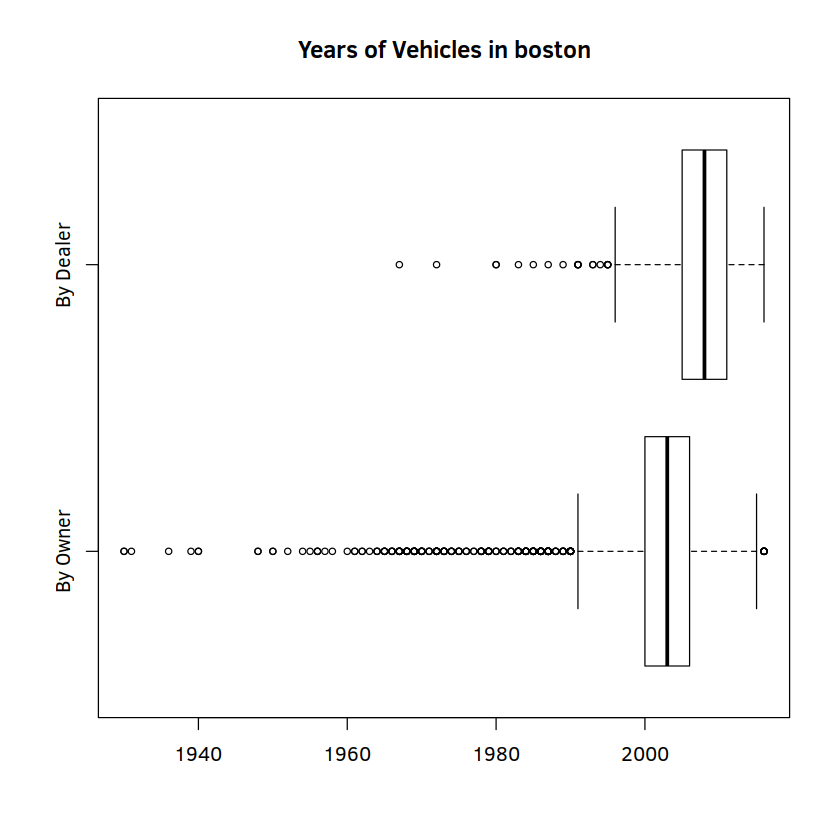

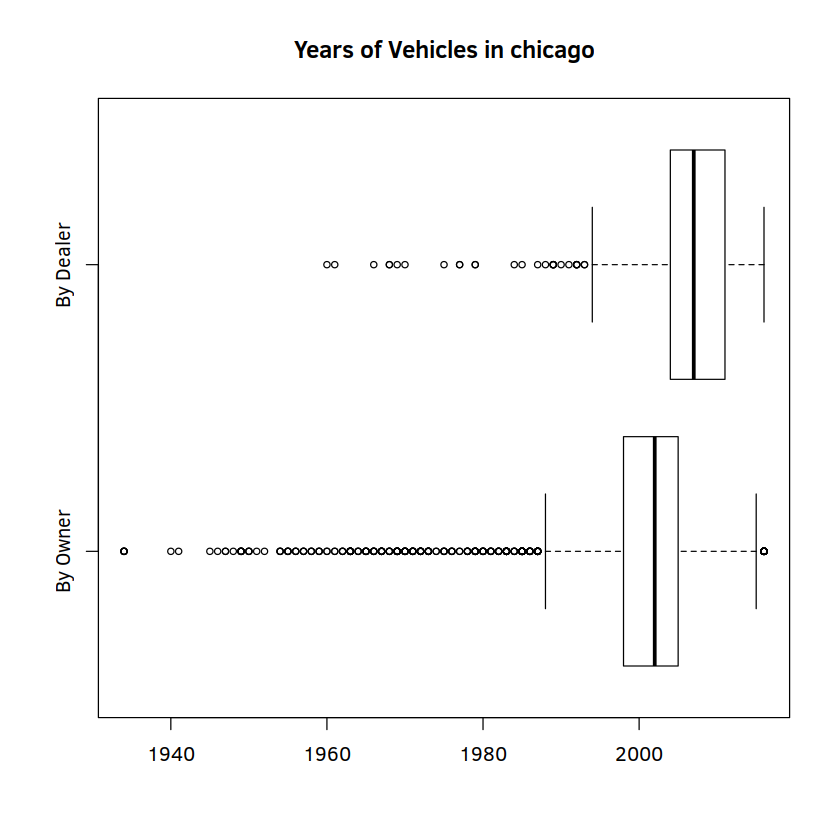

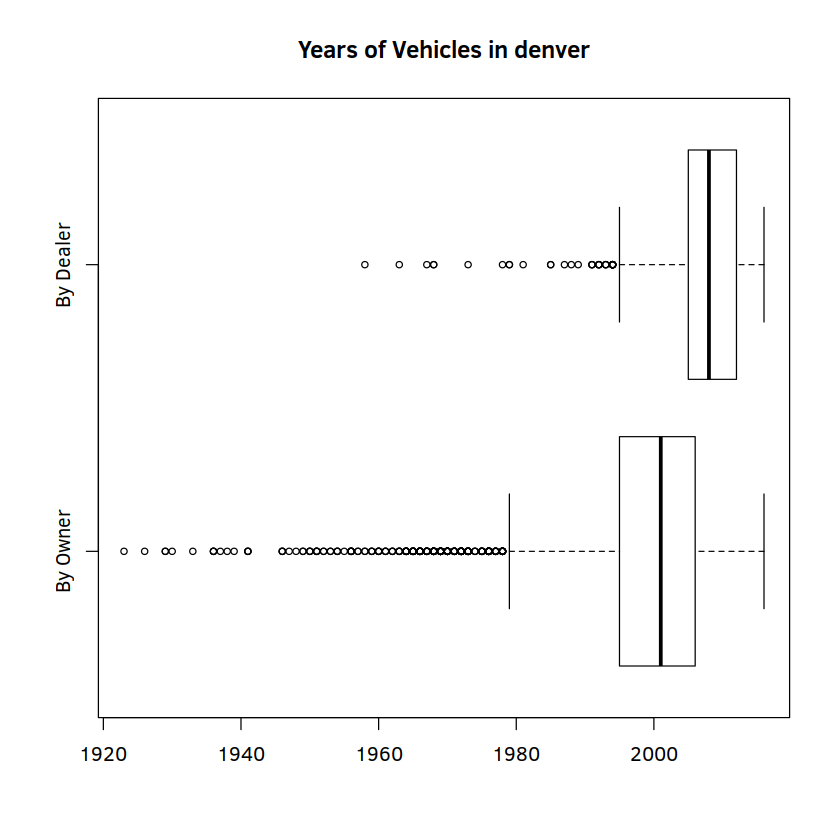

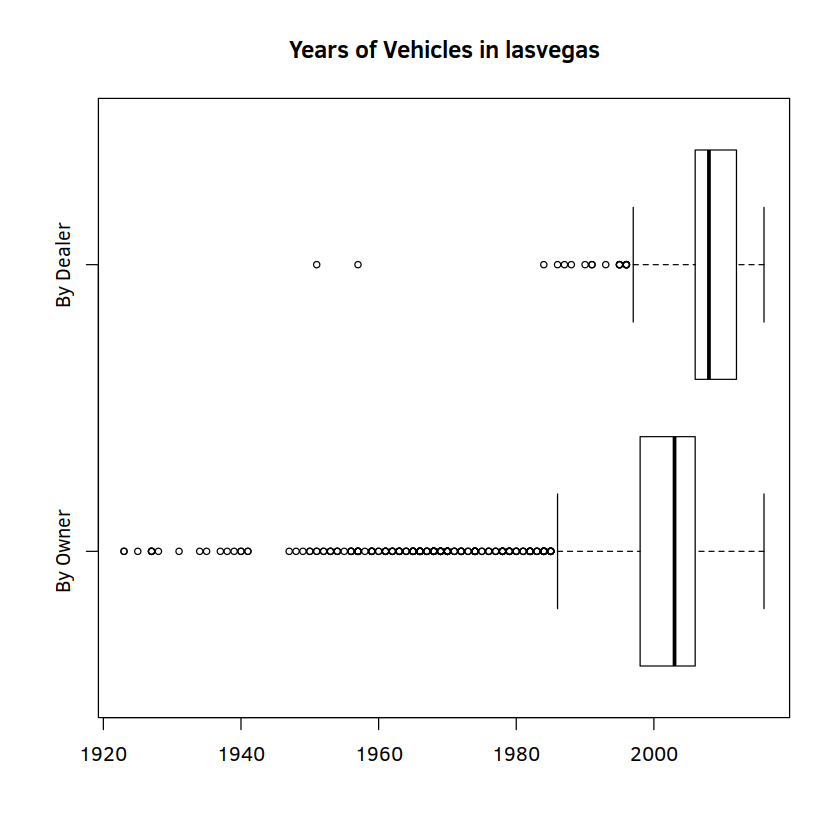

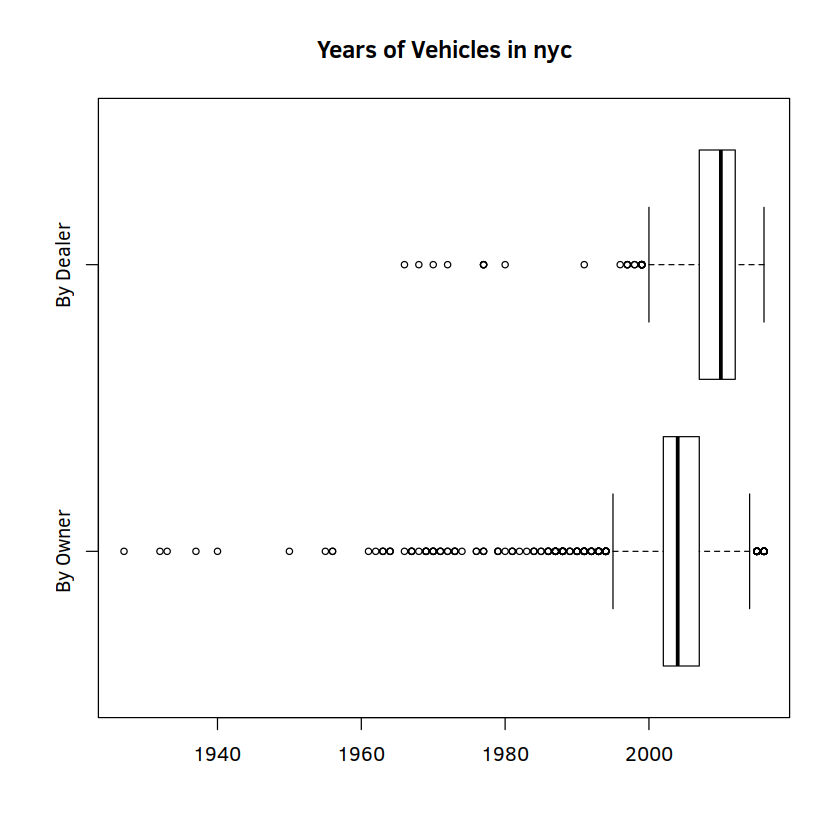

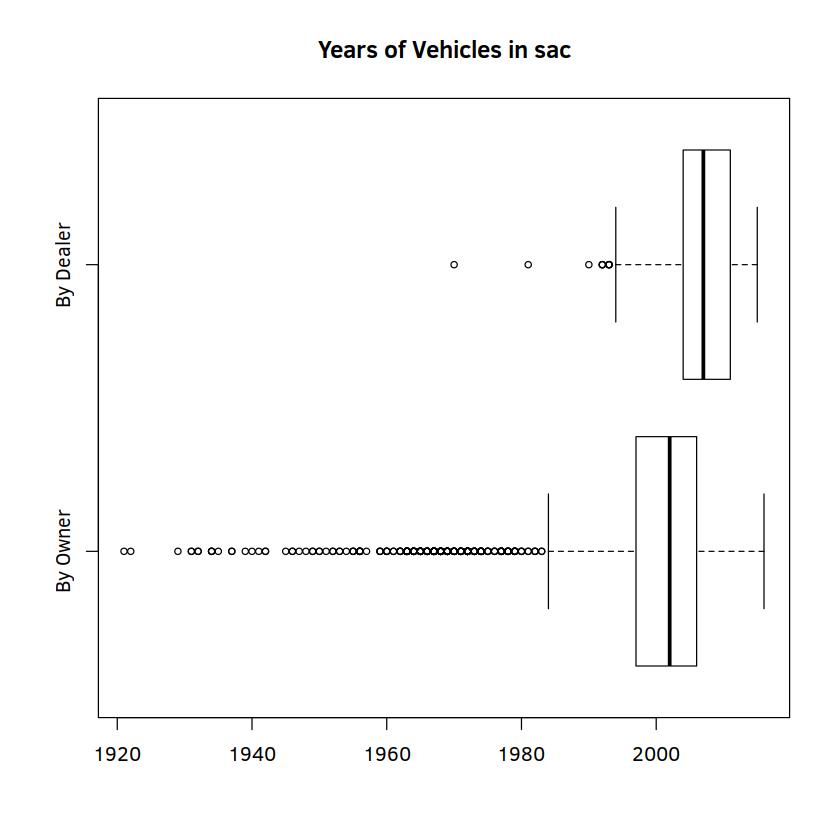

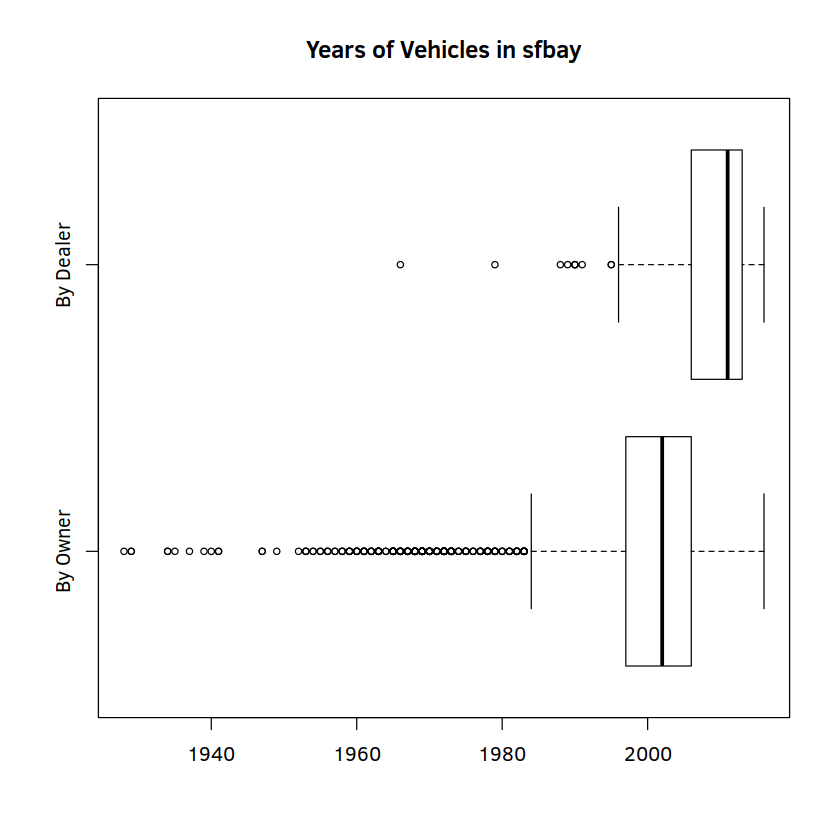

In [291]:
vp.split.city <- split(vposts, vposts$city)
# invisible to supress useless printing
invisible(sapply(names(vp.split.city), function(a.city){
  # Subset each data frame in the list by byOwner
  city.df <- vp.split.city[[a.city]]
  city.byOwner <- subset(city.df, byOwner == "TRUE")
  city.byDealer <- subset(city.df, byOwner == "FALSE")

  boxplot(city.byOwner$year, city.byDealer$year, horizontal = TRUE,
          names = c("By Owner", "By Dealer"), cex=0.7)
  title(main=paste("Years of Vehicles in", a.city))
}))

## 11


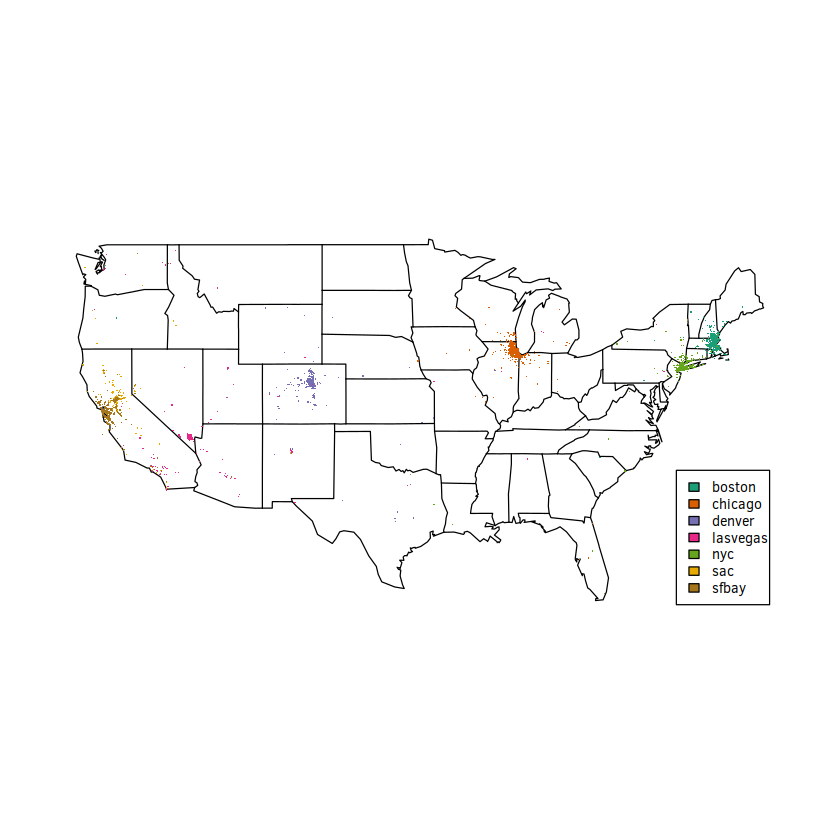

In [292]:
map("state")
with(vposts, points(long, lat, pch=".", col=pal7[factor(vposts$city)]))
legend("bottomright", legend=levels(vposts$city), col = pal7, fill=pal7, xpd=T, cex = 0.7)

Though only seven cities are included in the dataset, the locations of the individual vehicles span nearly the entire country. This may be attributable in part to Craigslist not offering individual sections for every city, causing posts from nearby smaller cities to be included. A potential explanation for the inclusion of posts in locations relatively far from the associated city is that some users might post in the section for a larger but more distant city because it attracts more users, especially if they do not receive any offers after posting in the section for a closer but less popular city. However, this idea does not account for the posts in areas like Florida and Texas, which would almost certainly contain large cities with popular sections on Craigslist that are much closer to the poster. Instead, these posts may reflect the locations of dealers that reside in a city other than the city that contains the dealership.   

## 12

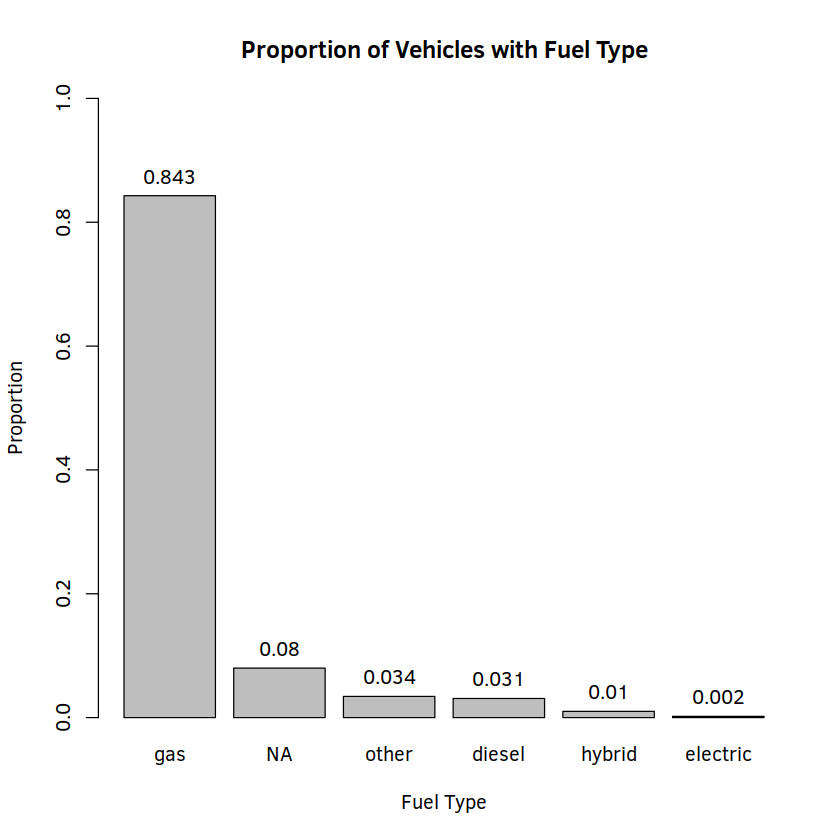

In [293]:
fuel.props <- sort(table(vposts$fuel, useNA = "always"), decreasing = T) /
                  length(vposts$fuel)

names(fuel.props)[is.na(names(fuel.props))] <- "NA" # Use string for display


barp <- barplot(fuel.props, cex.names = 1, xlab = "Fuel Type", 
                main = "Proportion of Vehicles with Fuel Type", 
                ylab = "Proportion", ylim = c(0,1))

text(x=barp, y=fuel.props, pos=3, labels = round(fuel.props,3))

The plot shows that the vast majority of posted vehicles use gas. 

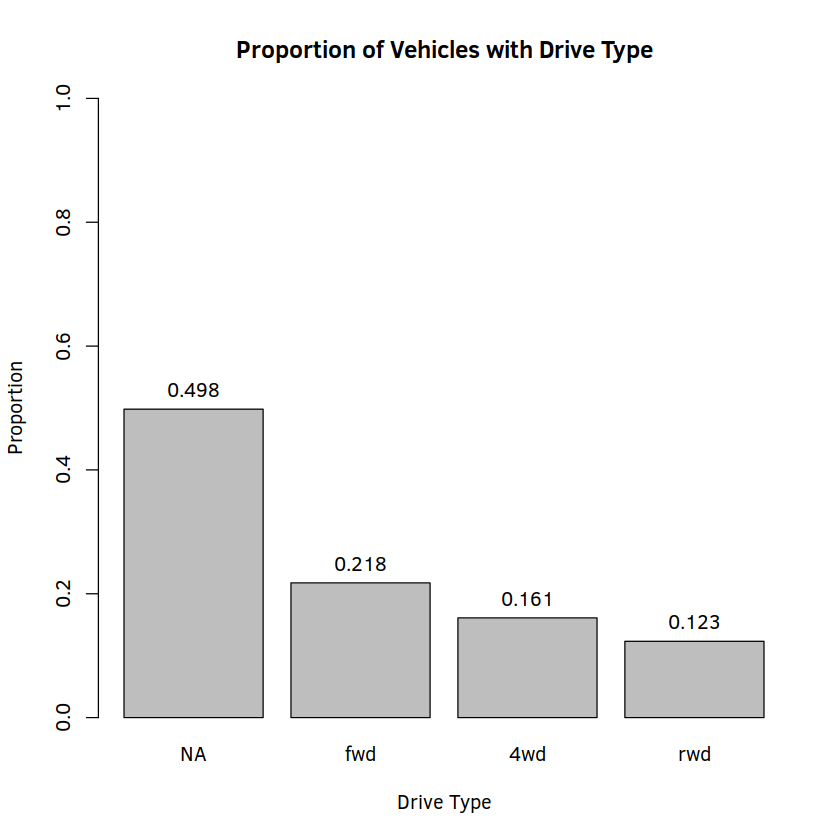

In [294]:
drive.props <- sort(table(vposts$drive, useNA = "always"), decreasing = T) /
                  length(vposts$drive)

names(drive.props)[is.na(names(drive.props))] <- "NA" # Use string for plots


barp <- barplot(drive.props, cex.names = 1, xlab = "Drive Type",
                main = "Proportion of Vehicles with Drive Type", 
                ylab = "Proportion", ylim = c(0,1))

text(x=barp, y=drive.props, pos=3, labels = round(drive.props,3))


Nearly half of the observations have no value for drive type, so the most popular drive type is not clear.

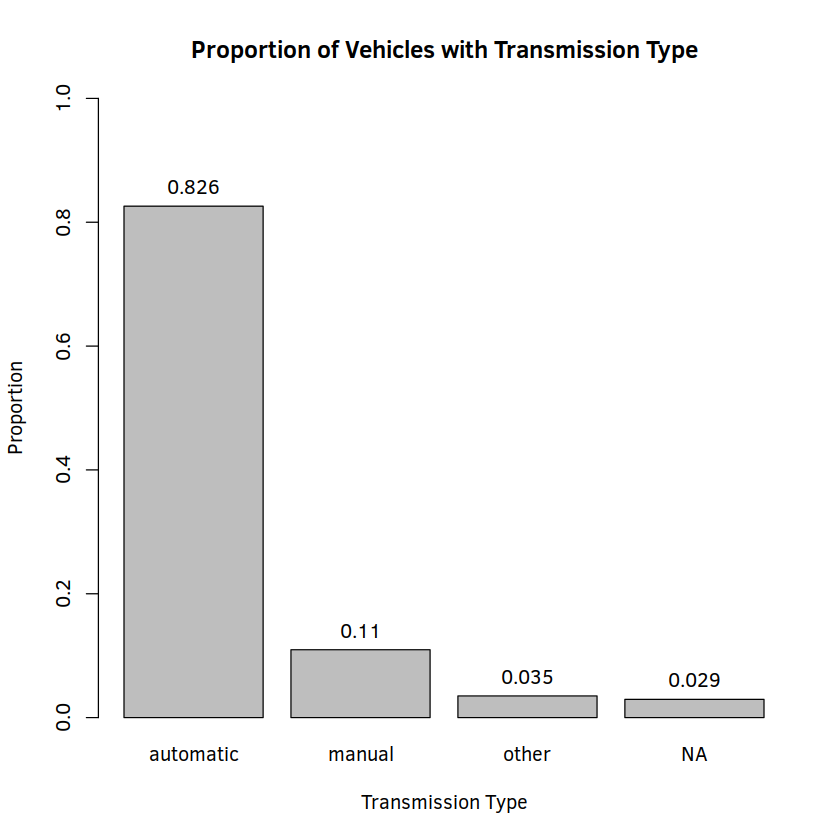

In [295]:
trans.props <- sort(table(vposts$transmission, useNA = "always"), decreasing = T) /
                  length(vposts$transmission)

names(trans.props)[is.na(names(trans.props))] <- "NA" # Use string for plots


barp <- barplot(trans.props, cex.names = 1, xlab = "Transmission Type",
                main = "Proportion of Vehicles with Transmission Type", 
                ylab = "Proportion", ylim = c(0,1))

text(x=barp, y=trans.props, pos=3, labels = round(trans.props,3))

The plot shows that automatic transmission is the most popular.

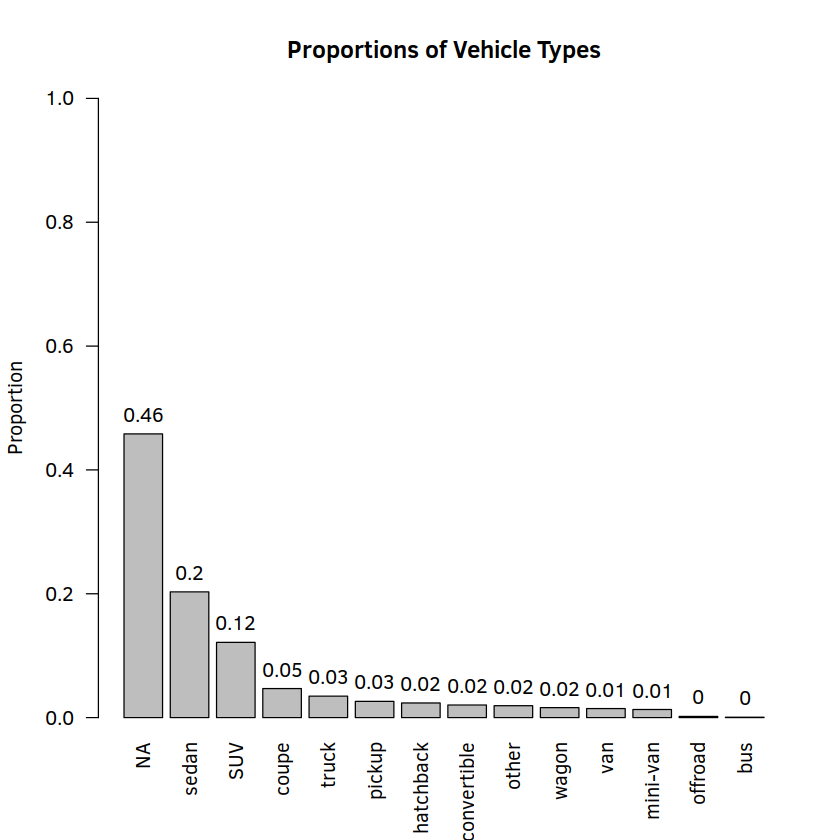

In [296]:
type.props <- sort(table(vposts$type, useNA = "always"), decreasing = T) /
                  length(vposts$type)

names(type.props)[is.na(names(type.props))] <- "NA" # Use string for plots


barp <- barplot(type.props, cex.names = 1, main = "Proportions of Vehicle Types", 
                ylab = "Proportion", ylim = c(0,1), las=2)

text(x=barp, y=type.props, pos=3, labels = round(type.props,2))

Though nearly half the values are missing, sedans and SUVs are clearly the most popular vehicle types among vehicles with a listed type.



-----


## 13


In [297]:
summary(vposts$odometer)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
0.000e+00 4.053e+04 9.051e+04 1.509e+05 1.300e+05 1.235e+09     10413 

In [298]:
obs.max.odometer <- vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, 
                            na.rm = TRUE), c("title", "odometer", "year")]

In [299]:
set.caption("The observation of maximum odometer value")
t(obs.max.odometer)

,posted8487
title,2006 hyundai tiburon - $3000 (north las vegas)
odometer,1234567890
year,2006


The maximum odometer value is unreasonably large, and is also just the digits in the sequence they appear
on a keyboard, so I replaced the value with NA.

In [300]:
vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, na.rm = TRUE), 
        "odometer"] <- NA

In [301]:
obs.max.odometer <- vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, 
                            na.rm = TRUE), c("title", "odometer", "year")]

In [302]:
set.caption("The new observation of maximum odometer value")
t(obs.max.odometer)

,posted20381
title,1988 Jeep Comanche - $9500 (Chelmsford)
odometer,99999999
year,1988


In [303]:
vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, na.rm = TRUE), 
        "odometer"] <- NA

In [304]:
    obs.max.odometer <- vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, 
                                na.rm = TRUE), c("title", "odometer", "year")]

In [305]:
set.caption("The new observations of maximum odometer value")
t(obs.max.odometer)

,posted19147,posted22247
title,economic on gas like new 2004 Chrysler - $2600 (lake mead y nelys),economic on gas like new 2004 Chrysler - $2500 (lake mead y nelys)
odometer,16000000,16000000
year,2004,2004


In [306]:
vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, na.rm = TRUE), 
        "odometer"] <- NA

In [307]:
obs.max.odometer <- vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, 
                            na.rm = TRUE), c("title", "description", "odometer")]

In [308]:
set.caption("The new observation of maximum odometer value")
t(obs.max.odometer)

,posted2498
title,1964 Pontiac GTO - $30 (RI/MA)
description,1964 Pontiac GTO
odometer,9500000


According to [https://www.yahoo.com/autos/s/the-first-car-to-3-million-miles-.html?nf=1](https://www.yahoo.com/autos/s/the-first-car-to-3-million-miles-.html?nf=1), a car with one of the highest known odometer values in 2011 was at about 3000000 miles. That vehicle was from 1966, only two years after 1964. It seems highly unlikely that a vehicle from nearly the same year would have three times as many miles, so I changed the value to NA.  

In [309]:
vposts[ !is.na(vposts$odometer) & vposts$odometer == max(vposts$odometer, na.rm = TRUE), 
        "odometer"] <- NA

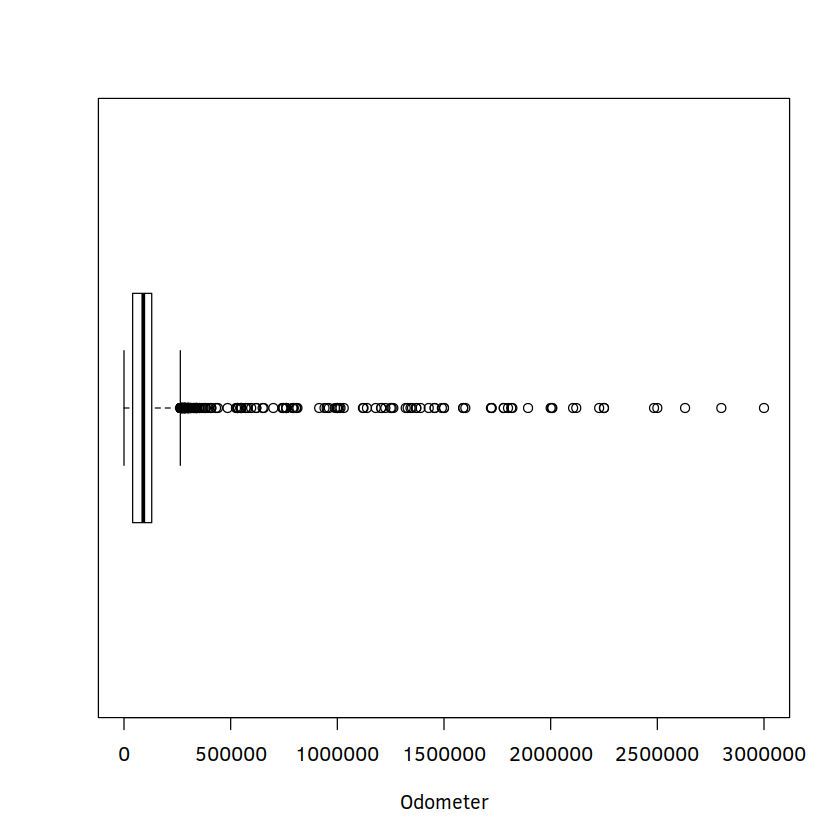

In [310]:
boxplot(vposts$odometer, horizontal = TRUE, xlab="Odometer")

The boxplot shows that all the remaining odometer values are at least no greater than 3000000. 

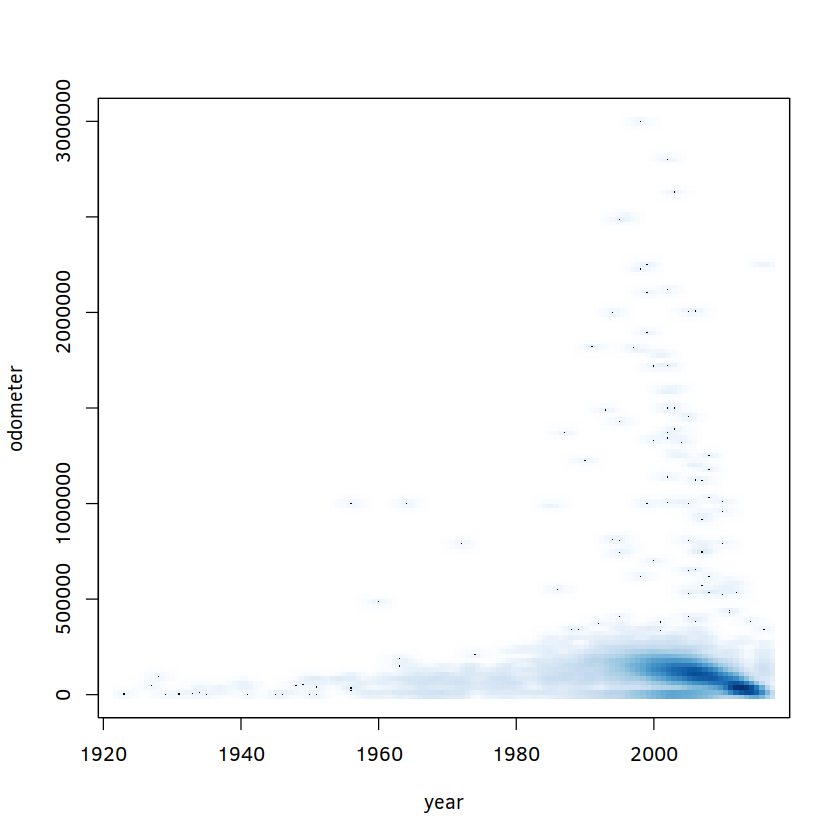

In [311]:
with(vposts, smoothScatter(year, odometer))

The plot shows that while a few vehicles with about a million miles are from the 50s and 60s, most are actually from the years around 2000. Because it is rare for a vehicle to last so many miles, this may indicate some problems with the values. 

## 14

#### Deciles of Vehicle Age

In [312]:
quantile(vposts$year, seq(0.1, 1, 0.1))

10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
1996 2000 2003 2004 2006 2007 2009 2011 2013 2016

Because only 10% of the vehicles were made in 1996 or earlier, I define these vehicles to be old. 

In [313]:
old.vehicles <- vposts[ !is.na(vposts$year) & vposts$year <= 1996, ]

In [314]:
old.vehicle.maker.props <- sort(table(old.vehicles$maker, useNA = "always") /
                             length(old.vehicles$maker), decreasing = TRUE)

#### The 10 most popular makers of old vehicles by proportion

In [315]:
head(old.vehicle.maker.props, 10)


 chevrolet       ford     toyota      honda        gmc      dodge       jeep 
0.19632414 0.18072960 0.07546644 0.06377054 0.03258145 0.02951824 0.02784740 
      <NA>   mercedes    pontiac 
0.02729045 0.02701197 0.02645503 

Chevrolet and Ford are the only makers with more than 10% of the old vehicles, together accounting for more than a third of the vehicles.

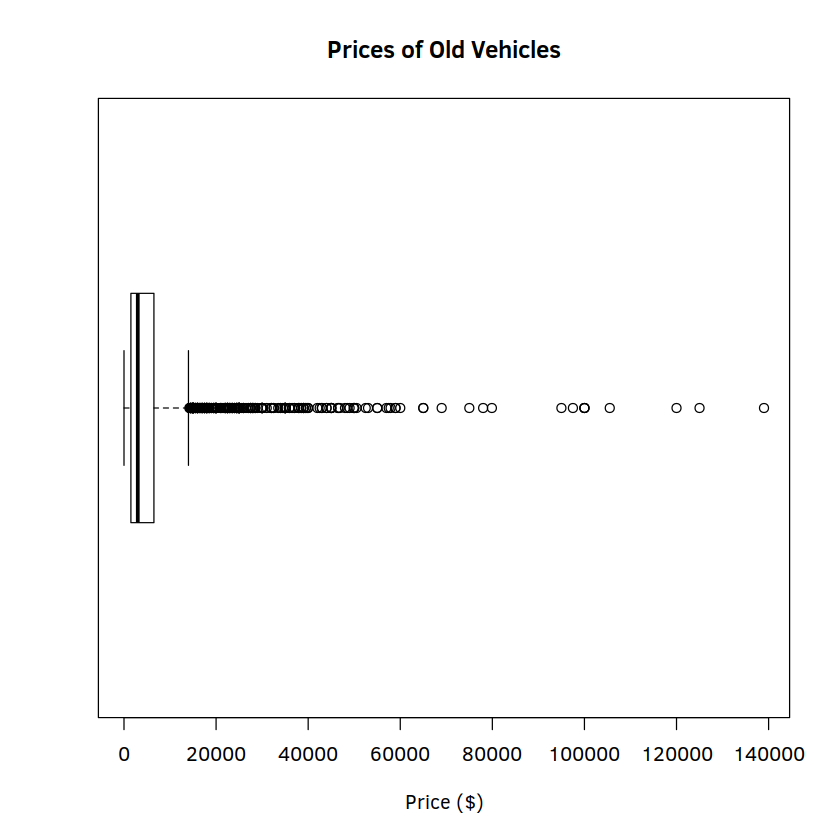

In [316]:
boxplot(old.vehicles$price, horizontal = TRUE, main="Prices of Old Vehicles", xlab="Price ($)")

In [317]:
summary(old.vehicles$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1    1500    2995    6267    6500  139000     242 

The distribution of the prices of these vehicles is skewed, with 75% of them priced at 6500 or below, while some vehicles have much higher prices. 

## 15

One important variable might be whether a vehicle has actually been sold. This data would be useful to determine how the vehicles that are actually sold differ, if at all, from all the vehicles that are posted. This variable could not be deduced from the other variables, and it may not even be possible to obtain it from the site, if vehicles that are sold simmply have their posts closed and made inaccessible. 

## 16

In [318]:
clean.conditions <- vposts$condition

conditions <- as.vector(sort(table(clean.conditions, useNA = "always") / 
                               length(clean.conditions), decreasing = T))
names(conditions) <- names(sort(table(clean.conditions, useNA = "always"), 
                                decreasing = T))

names(conditions)[is.na(names(conditions))] <- "NA"

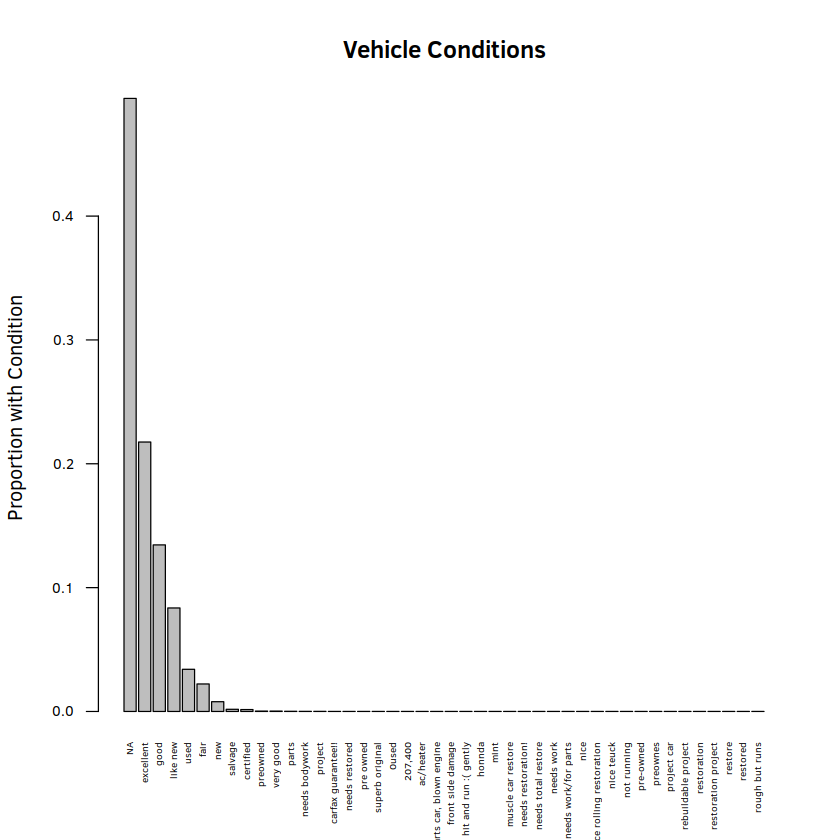

In [319]:
barplot(conditions, las=2, cex.names = 0.5, cex.axis = 0.7)
title(main="Vehicle Conditions", ylab="Proportion with Condition")

Many of the conditions were used to describe very few vehicles, often only 1. Because these conditions will not lead to useful conclusions, only the more common conditions will be considered.  

In [320]:
top.conditions <- conditions[conditions >= .001]
# Subset with only the top conditions
vp.top.conditions <- vposts[vposts$condition %in% names(top.conditions), ]

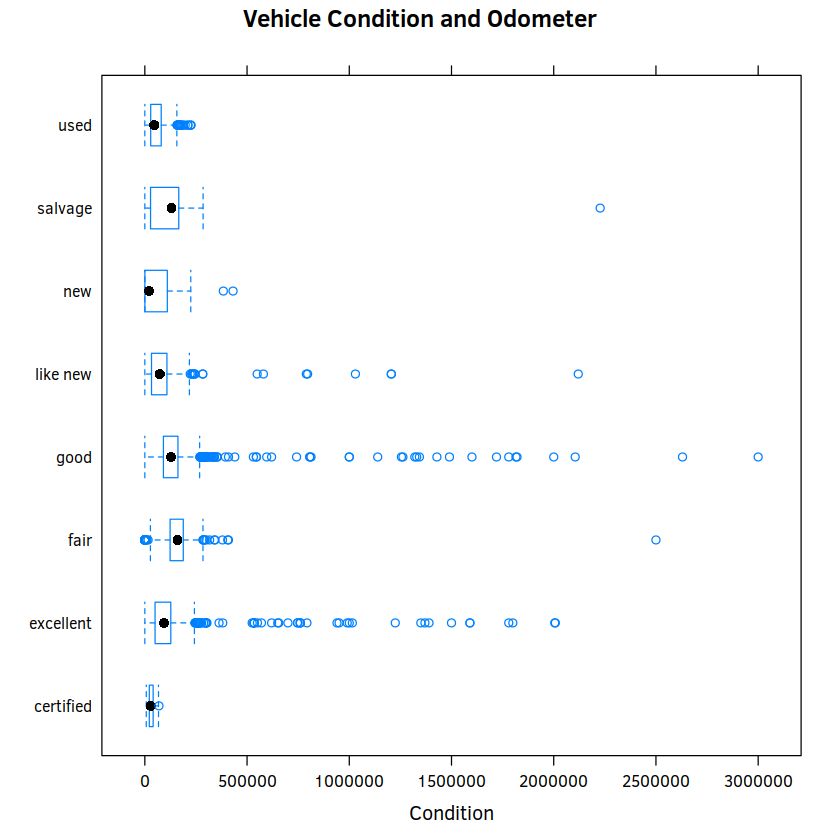

In [321]:
bwplot(condition ~ odometer, data = vp.top.conditions, 
       main="Vehicle Condition and Odometer", xlab = "Condition")

The boxplots show that vehicles with conditions like "excellent", "new", or "like new" tend to have lower odometer values than vehicles with conditions like "fair" or "good". The "certified" condition shows the least range of odometer values, likely due to having compmaratively few observations. Curiously, the "used" condition seems to have relativley low odometer values, with a distribution similar to "like new".

-----